In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
env = gym.make(env_name)


seed = 0
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_mdp_", evaluate=True)


Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "mdp_policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

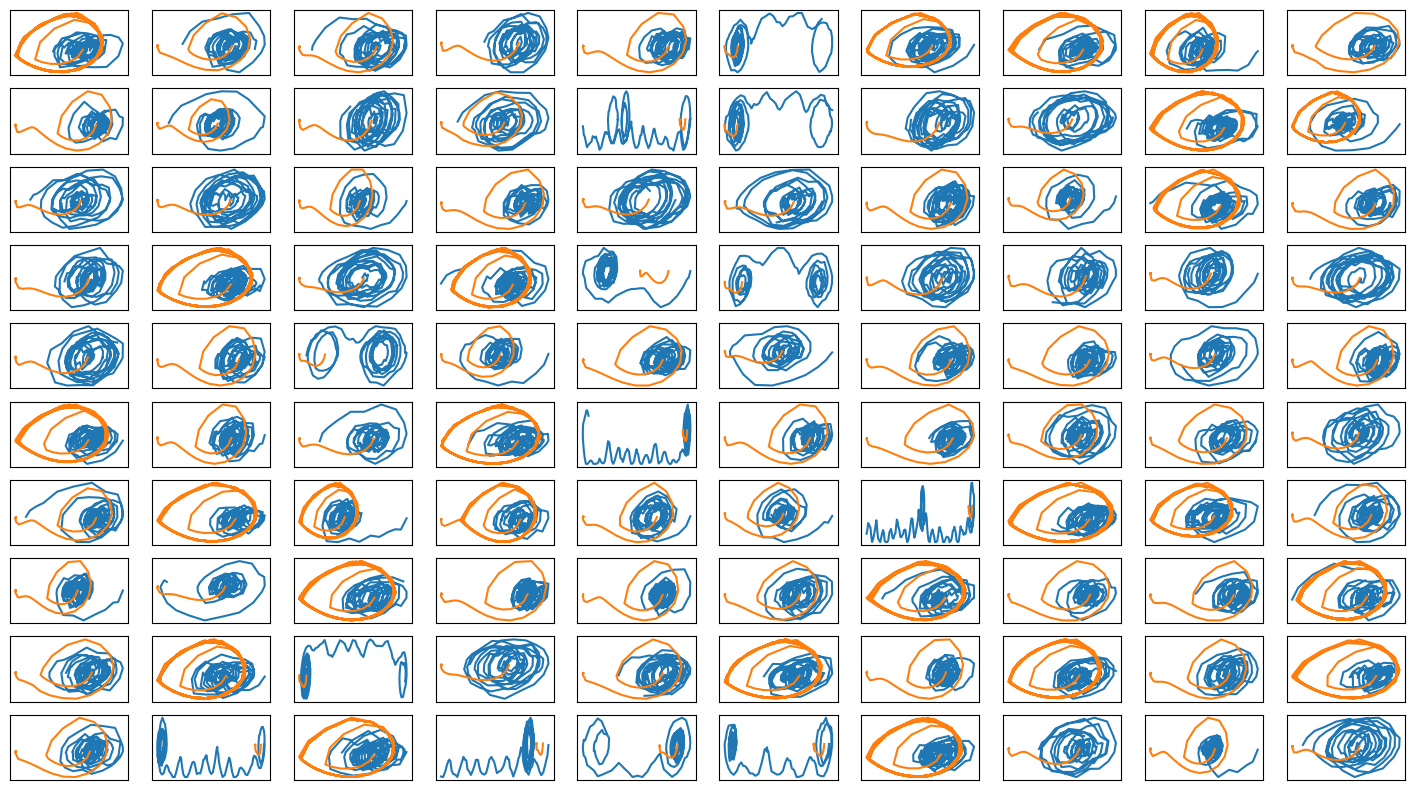

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 1509.32060  validloss 1617.24579±0.00000  bestvalidloss 1617.24579  last_update 0
train: iter 1  trainloss 524.24815  validloss 490.06800±0.00000  bestvalidloss 490.06800  last_update 0
train: iter 2  trainloss 472.16031  validloss 474.70177±0.00000  bestvalidloss 474.70177  last_update 0
train: iter 3  trainloss 457.06178  validloss 452.28712±0.00000  bestvalidloss 452.28712  last_update 0
train: iter 4  trainloss 436.44107  validloss 439.98464±0.00000  bestvalidloss 439.98464  last_update 0
train: iter 5  trainloss 428.61700  validloss 425.60276±0.00000  bestvalidloss 425.60276  last_update 0
train: iter 6  trainloss 417.65321  validloss 418.95581±0.00000  bestvalidloss 418.95581  last_update 0
train: iter 7  trainloss 408.84284  validloss 409.13096±0.00000  bestvalidloss 409.13096  last_update 0
train: iter 8  trainloss 404.25639  validloss 404.09338±0.00000  bestvalidloss 404.09338  last_update 0
train: iter 9  trainloss 399.8155

train: iter 78  trainloss -427.66468  validloss -345.79320±0.00000  bestvalidloss -410.87452  last_update 2
train: iter 79  trainloss -454.75120  validloss -421.57985±0.00000  bestvalidloss -421.57985  last_update 0
train: iter 80  trainloss -475.33185  validloss -434.29029±0.00000  bestvalidloss -434.29029  last_update 0
train: iter 81  trainloss -468.08527  validloss -442.48910±0.00000  bestvalidloss -442.48910  last_update 0
train: iter 82  trainloss -461.54289  validloss -433.81968±0.00000  bestvalidloss -442.48910  last_update 1
train: iter 83  trainloss -482.55929  validloss -438.61374±0.00000  bestvalidloss -442.48910  last_update 2
train: iter 84  trainloss -432.92765  validloss -419.98572±0.00000  bestvalidloss -442.48910  last_update 3
train: iter 85  trainloss -483.08268  validloss -395.79804±0.00000  bestvalidloss -442.48910  last_update 4
train: iter 86  trainloss -501.39620  validloss -470.91456±0.00000  bestvalidloss -470.91456  last_update 0
train: iter 87  trainloss -5

train: iter 154  trainloss -571.74032  validloss -364.46691±0.00000  bestvalidloss -518.45082  last_update 49
train: iter 155  trainloss -575.42462  validloss -377.62668±0.00000  bestvalidloss -518.45082  last_update 50
train: iter 156  trainloss -582.40082  validloss -324.85984±0.00000  bestvalidloss -518.45082  last_update 51
train: iter 157  trainloss -545.80549  validloss -277.82383±0.00000  bestvalidloss -518.45082  last_update 52
train: iter 158  trainloss -579.12879  validloss -359.20366±0.00000  bestvalidloss -518.45082  last_update 53
train: iter 159  trainloss -583.46814  validloss -401.97819±0.00000  bestvalidloss -518.45082  last_update 54
train: iter 160  trainloss -595.63850  validloss -205.75781±0.00000  bestvalidloss -518.45082  last_update 55
train: iter 161  trainloss -591.38604  validloss -375.57991±0.00000  bestvalidloss -518.45082  last_update 56
train: iter 162  trainloss -596.66468  validloss -372.11471±0.00000  bestvalidloss -518.45082  last_update 57
train: ite

train: iter 230  trainloss -640.32332  validloss -526.04064±0.00000  bestvalidloss -614.03013  last_update 8
train: iter 231  trainloss -638.64140  validloss -524.83213±0.00000  bestvalidloss -614.03013  last_update 9
train: iter 232  trainloss -660.08424  validloss -503.81741±0.00000  bestvalidloss -614.03013  last_update 10
train: iter 233  trainloss -656.67544  validloss -430.36111±0.00000  bestvalidloss -614.03013  last_update 11
train: iter 234  trainloss -637.08897  validloss -211.16066±0.00000  bestvalidloss -614.03013  last_update 12
train: iter 235  trainloss -663.91287  validloss -519.11394±0.00000  bestvalidloss -614.03013  last_update 13
train: iter 236  trainloss -625.07159  validloss -291.69075±0.00000  bestvalidloss -614.03013  last_update 14
train: iter 237  trainloss -635.58955  validloss -611.75962±0.00000  bestvalidloss -614.03013  last_update 15
train: iter 238  trainloss -659.48343  validloss -608.46218±0.00000  bestvalidloss -614.03013  last_update 16
train: iter 

train: iter 305  trainloss -673.87051  validloss -640.47559±0.00000  bestvalidloss -656.50254  last_update 4
train: iter 306  trainloss -662.42834  validloss -622.51034±0.00000  bestvalidloss -656.50254  last_update 5
train: iter 307  trainloss -646.79325  validloss -638.32129±0.00000  bestvalidloss -656.50254  last_update 6
train: iter 308  trainloss -671.70251  validloss -641.98069±0.00000  bestvalidloss -656.50254  last_update 7
train: iter 309  trainloss -670.76713  validloss -640.85417±0.00000  bestvalidloss -656.50254  last_update 8
train: iter 310  trainloss -692.42971  validloss -657.12359±0.00000  bestvalidloss -657.12359  last_update 0
train: iter 311  trainloss -688.46052  validloss -665.51739±0.00000  bestvalidloss -665.51739  last_update 0
train: iter 312  trainloss -694.12860  validloss -651.10734±0.00000  bestvalidloss -665.51739  last_update 1
train: iter 313  trainloss -702.71493  validloss -660.20477±0.00000  bestvalidloss -665.51739  last_update 2
train: iter 314  tr

train: iter 380  trainloss -718.62791  validloss -661.29493±0.00000  bestvalidloss -676.73999  last_update 30
train: iter 381  trainloss -710.92465  validloss -680.36124±0.00000  bestvalidloss -680.36124  last_update 0
train: iter 382  trainloss -674.47502  validloss -679.68986±0.00000  bestvalidloss -680.36124  last_update 1
train: iter 383  trainloss -694.28335  validloss -654.56317±0.00000  bestvalidloss -680.36124  last_update 2
train: iter 384  trainloss -720.38597  validloss -670.53132±0.00000  bestvalidloss -680.36124  last_update 3
train: iter 385  trainloss -676.25046  validloss -670.05889±0.00000  bestvalidloss -680.36124  last_update 4
train: iter 386  trainloss -692.62068  validloss -643.69878±0.00000  bestvalidloss -680.36124  last_update 5
train: iter 387  trainloss -595.72576  validloss -631.02678±0.00000  bestvalidloss -680.36124  last_update 6
train: iter 388  trainloss -694.70475  validloss -644.45603±0.00000  bestvalidloss -680.36124  last_update 7
train: iter 389  t

train: iter 455  trainloss -691.49861  validloss -668.01566±0.00000  bestvalidloss -689.29558  last_update 3
train: iter 456  trainloss -723.89105  validloss -665.76688±0.00000  bestvalidloss -689.29558  last_update 4
train: iter 457  trainloss -704.80619  validloss -686.81393±0.00000  bestvalidloss -689.29558  last_update 5
train: iter 458  trainloss -674.44635  validloss -640.09775±0.00000  bestvalidloss -689.29558  last_update 6
train: iter 459  trainloss -695.00039  validloss -671.41399±0.00000  bestvalidloss -689.29558  last_update 7
train: iter 460  trainloss -709.63223  validloss -652.86283±0.00000  bestvalidloss -689.29558  last_update 8
train: iter 461  trainloss -711.30686  validloss -667.66539±0.00000  bestvalidloss -689.29558  last_update 9
train: iter 462  trainloss -702.73252  validloss -687.82842±0.00000  bestvalidloss -689.29558  last_update 10
train: iter 463  trainloss -708.76030  validloss -659.91224±0.00000  bestvalidloss -689.29558  last_update 11
train: iter 464  

train: iter 530  trainloss -723.45089  validloss -672.80325±0.00000  bestvalidloss -704.26806  last_update 9
train: iter 531  trainloss -725.90249  validloss -699.94900±0.00000  bestvalidloss -704.26806  last_update 10
train: iter 532  trainloss -697.57046  validloss -679.52501±0.00000  bestvalidloss -704.26806  last_update 11
train: iter 533  trainloss -676.88054  validloss -641.67306±0.00000  bestvalidloss -704.26806  last_update 12
train: iter 534  trainloss -692.50812  validloss -678.75575±0.00000  bestvalidloss -704.26806  last_update 13
train: iter 535  trainloss -686.40189  validloss -452.60325±0.00000  bestvalidloss -704.26806  last_update 14
train: iter 536  trainloss -690.82337  validloss -636.07753±0.00000  bestvalidloss -704.26806  last_update 15
train: iter 537  trainloss -716.01815  validloss -659.26521±0.00000  bestvalidloss -704.26806  last_update 16
train: iter 538  trainloss -711.42169  validloss -685.69447±0.00000  bestvalidloss -704.26806  last_update 17
train: iter

train: iter 605  trainloss -713.20331  validloss -698.19166±0.00000  bestvalidloss -704.26806  last_update 84
train: iter 606  trainloss -740.70013  validloss -706.01629±0.00000  bestvalidloss -706.01629  last_update 0
train: iter 607  trainloss -742.63456  validloss -707.37378±0.00000  bestvalidloss -707.37378  last_update 0
train: iter 608  trainloss -744.69861  validloss -698.41809±0.00000  bestvalidloss -707.37378  last_update 1
train: iter 609  trainloss -750.49029  validloss -700.04509±0.00000  bestvalidloss -707.37378  last_update 2
train: iter 610  trainloss -726.78199  validloss -686.51138±0.00000  bestvalidloss -707.37378  last_update 3
train: iter 611  trainloss -723.80710  validloss -689.63499±0.00000  bestvalidloss -707.37378  last_update 4
train: iter 612  trainloss -720.42130  validloss -685.84091±0.00000  bestvalidloss -707.37378  last_update 5
train: iter 613  trainloss -738.63588  validloss -687.02628±0.00000  bestvalidloss -707.37378  last_update 6
train: iter 614  t

train: iter 680  trainloss -716.21703  validloss -676.33992±0.00000  bestvalidloss -707.37378  last_update 73
train: iter 681  trainloss -704.17743  validloss -680.92541±0.00000  bestvalidloss -707.37378  last_update 74
train: iter 682  trainloss -707.52447  validloss -675.83125±0.00000  bestvalidloss -707.37378  last_update 75
train: iter 683  trainloss -719.75983  validloss -661.09806±0.00000  bestvalidloss -707.37378  last_update 76
train: iter 684  trainloss -729.29699  validloss -685.04270±0.00000  bestvalidloss -707.37378  last_update 77
train: iter 685  trainloss -717.88304  validloss -683.91505±0.00000  bestvalidloss -707.37378  last_update 78
train: iter 686  trainloss -714.01799  validloss -674.03608±0.00000  bestvalidloss -707.37378  last_update 79
train: iter 687  trainloss -730.18345  validloss -683.21435±0.00000  bestvalidloss -707.37378  last_update 80
train: iter 688  trainloss -717.53133  validloss -686.42042±0.00000  bestvalidloss -707.37378  last_update 81
train: ite

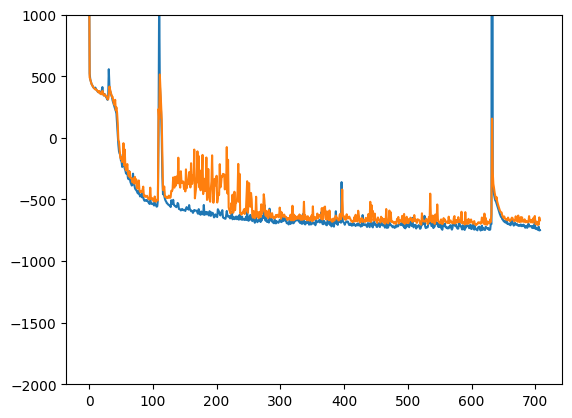

train_weighted_vae: enc
train: iter 0  trainloss -730.19882  validloss -710.33177±0.00000  bestvalidloss -710.33177  last_update 0
train: iter 1  trainloss -754.69123  validloss -689.21971±0.00000  bestvalidloss -710.33177  last_update 1
train: iter 2  trainloss -746.77798  validloss -698.73040±0.00000  bestvalidloss -710.33177  last_update 2
train: iter 3  trainloss -755.27959  validloss -680.82568±0.00000  bestvalidloss -710.33177  last_update 3
train: iter 4  trainloss -756.04490  validloss -700.66465±0.00000  bestvalidloss -710.33177  last_update 4
train: iter 5  trainloss -731.79834  validloss -705.56464±0.00000  bestvalidloss -710.33177  last_update 5
train: iter 6  trainloss -746.30337  validloss -680.17565±0.00000  bestvalidloss -710.33177  last_update 6
train: iter 7  trainloss -749.45010  validloss -687.95475±0.00000  bestvalidloss -710.33177  last_update 7
train: iter 8  trainloss -740.98461  validloss -682.44512±0.00000  bestvalidloss -710.33177  last_update 8
train: iter 9

train: iter 77  trainloss -752.68961  validloss -689.65497±0.00000  bestvalidloss -710.33177  last_update 77
train: iter 78  trainloss -686.78853  validloss -711.09491±0.00000  bestvalidloss -711.09491  last_update 0
train: iter 79  trainloss -378.43015  validloss -698.33852±0.00000  bestvalidloss -711.09491  last_update 1
train: iter 80  trainloss -676.46363  validloss -675.43318±0.00000  bestvalidloss -711.09491  last_update 2
train: iter 81  trainloss -754.70008  validloss -703.21027±0.00000  bestvalidloss -711.09491  last_update 3
train: iter 82  trainloss -759.70099  validloss -683.73797±0.00000  bestvalidloss -711.09491  last_update 4
train: iter 83  trainloss -749.39257  validloss -699.76313±0.00000  bestvalidloss -711.09491  last_update 5
train: iter 84  trainloss -751.48931  validloss -704.49871±0.00000  bestvalidloss -711.09491  last_update 6
train: iter 85  trainloss -756.30808  validloss -701.06633±0.00000  bestvalidloss -711.09491  last_update 7
train: iter 86  trainloss -

train: iter 152  trainloss -745.31456  validloss -703.95452±0.00000  bestvalidloss -711.09491  last_update 74
train: iter 153  trainloss -756.30012  validloss -691.91492±0.00000  bestvalidloss -711.09491  last_update 75
train: iter 154  trainloss -747.75589  validloss -702.82918±0.00000  bestvalidloss -711.09491  last_update 76
train: iter 155  trainloss -746.02314  validloss -702.92500±0.00000  bestvalidloss -711.09491  last_update 77
train: iter 156  trainloss -753.15267  validloss -681.26400±0.00000  bestvalidloss -711.09491  last_update 78
train: iter 157  trainloss -747.76871  validloss -701.16401±0.00000  bestvalidloss -711.09491  last_update 79
train: iter 158  trainloss -758.74244  validloss -703.47546±0.00000  bestvalidloss -711.09491  last_update 80
train: iter 159  trainloss -754.09132  validloss -703.76767±0.00000  bestvalidloss -711.09491  last_update 81
train: iter 160  trainloss -756.96729  validloss -683.03411±0.00000  bestvalidloss -711.09491  last_update 82
train: ite

train: iter 48  trainloss -752.84257  validloss -695.58032±0.00000  bestvalidloss -716.49343  last_update 16
train: iter 49  trainloss -739.79556  validloss -698.53828±0.00000  bestvalidloss -716.49343  last_update 17
train: iter 50  trainloss -758.12979  validloss -711.48831±0.00000  bestvalidloss -716.49343  last_update 18
train: iter 51  trainloss -754.93453  validloss -699.97328±0.00000  bestvalidloss -716.49343  last_update 19
train: iter 52  trainloss -750.17923  validloss -692.95604±0.00000  bestvalidloss -716.49343  last_update 20
train: iter 53  trainloss -745.95011  validloss -678.82704±0.00000  bestvalidloss -716.49343  last_update 21
train: iter 54  trainloss -759.17825  validloss -688.84277±0.00000  bestvalidloss -716.49343  last_update 22
train: iter 55  trainloss -741.35349  validloss -707.48546±0.00000  bestvalidloss -716.49343  last_update 23
train: iter 56  trainloss -747.11702  validloss -688.00778±0.00000  bestvalidloss -716.49343  last_update 24
train: iter 57  tra

train: iter 124  trainloss -751.61657  validloss -696.87849±0.00000  bestvalidloss -716.49343  last_update 92
train: iter 125  trainloss -743.74584  validloss -668.96080±0.00000  bestvalidloss -716.49343  last_update 93
train: iter 126  trainloss -746.89780  validloss -682.01038±0.00000  bestvalidloss -716.49343  last_update 94
train: iter 127  trainloss -758.73391  validloss -706.22209±0.00000  bestvalidloss -716.49343  last_update 95
train: iter 128  trainloss -756.05579  validloss -689.50899±0.00000  bestvalidloss -716.49343  last_update 96
train: iter 129  trainloss -752.78631  validloss -696.60555±0.00000  bestvalidloss -716.49343  last_update 97
train: iter 130  trainloss -744.55125  validloss -700.63509±0.00000  bestvalidloss -716.49343  last_update 98
train: iter 131  trainloss -759.57664  validloss -706.67816±0.00000  bestvalidloss -716.49343  last_update 99
train: iter 132  trainloss -767.66605  validloss -708.66420±0.00000  bestvalidloss -716.49343  last_update 100
train: fi

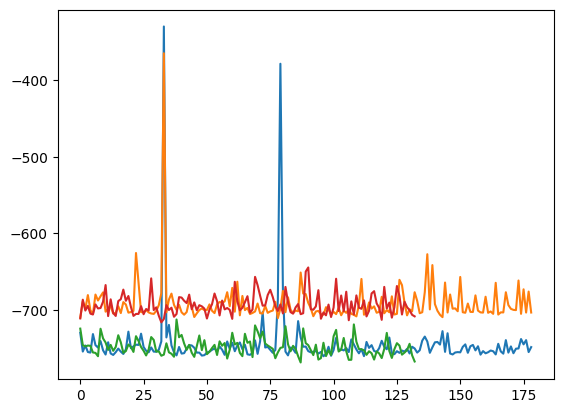

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()

vi.save()


In [10]:
vi.load()
vi.update_mulogvar_offlinedata()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  predict diverge [   7.74578972 -150.78676298]
43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  predict 

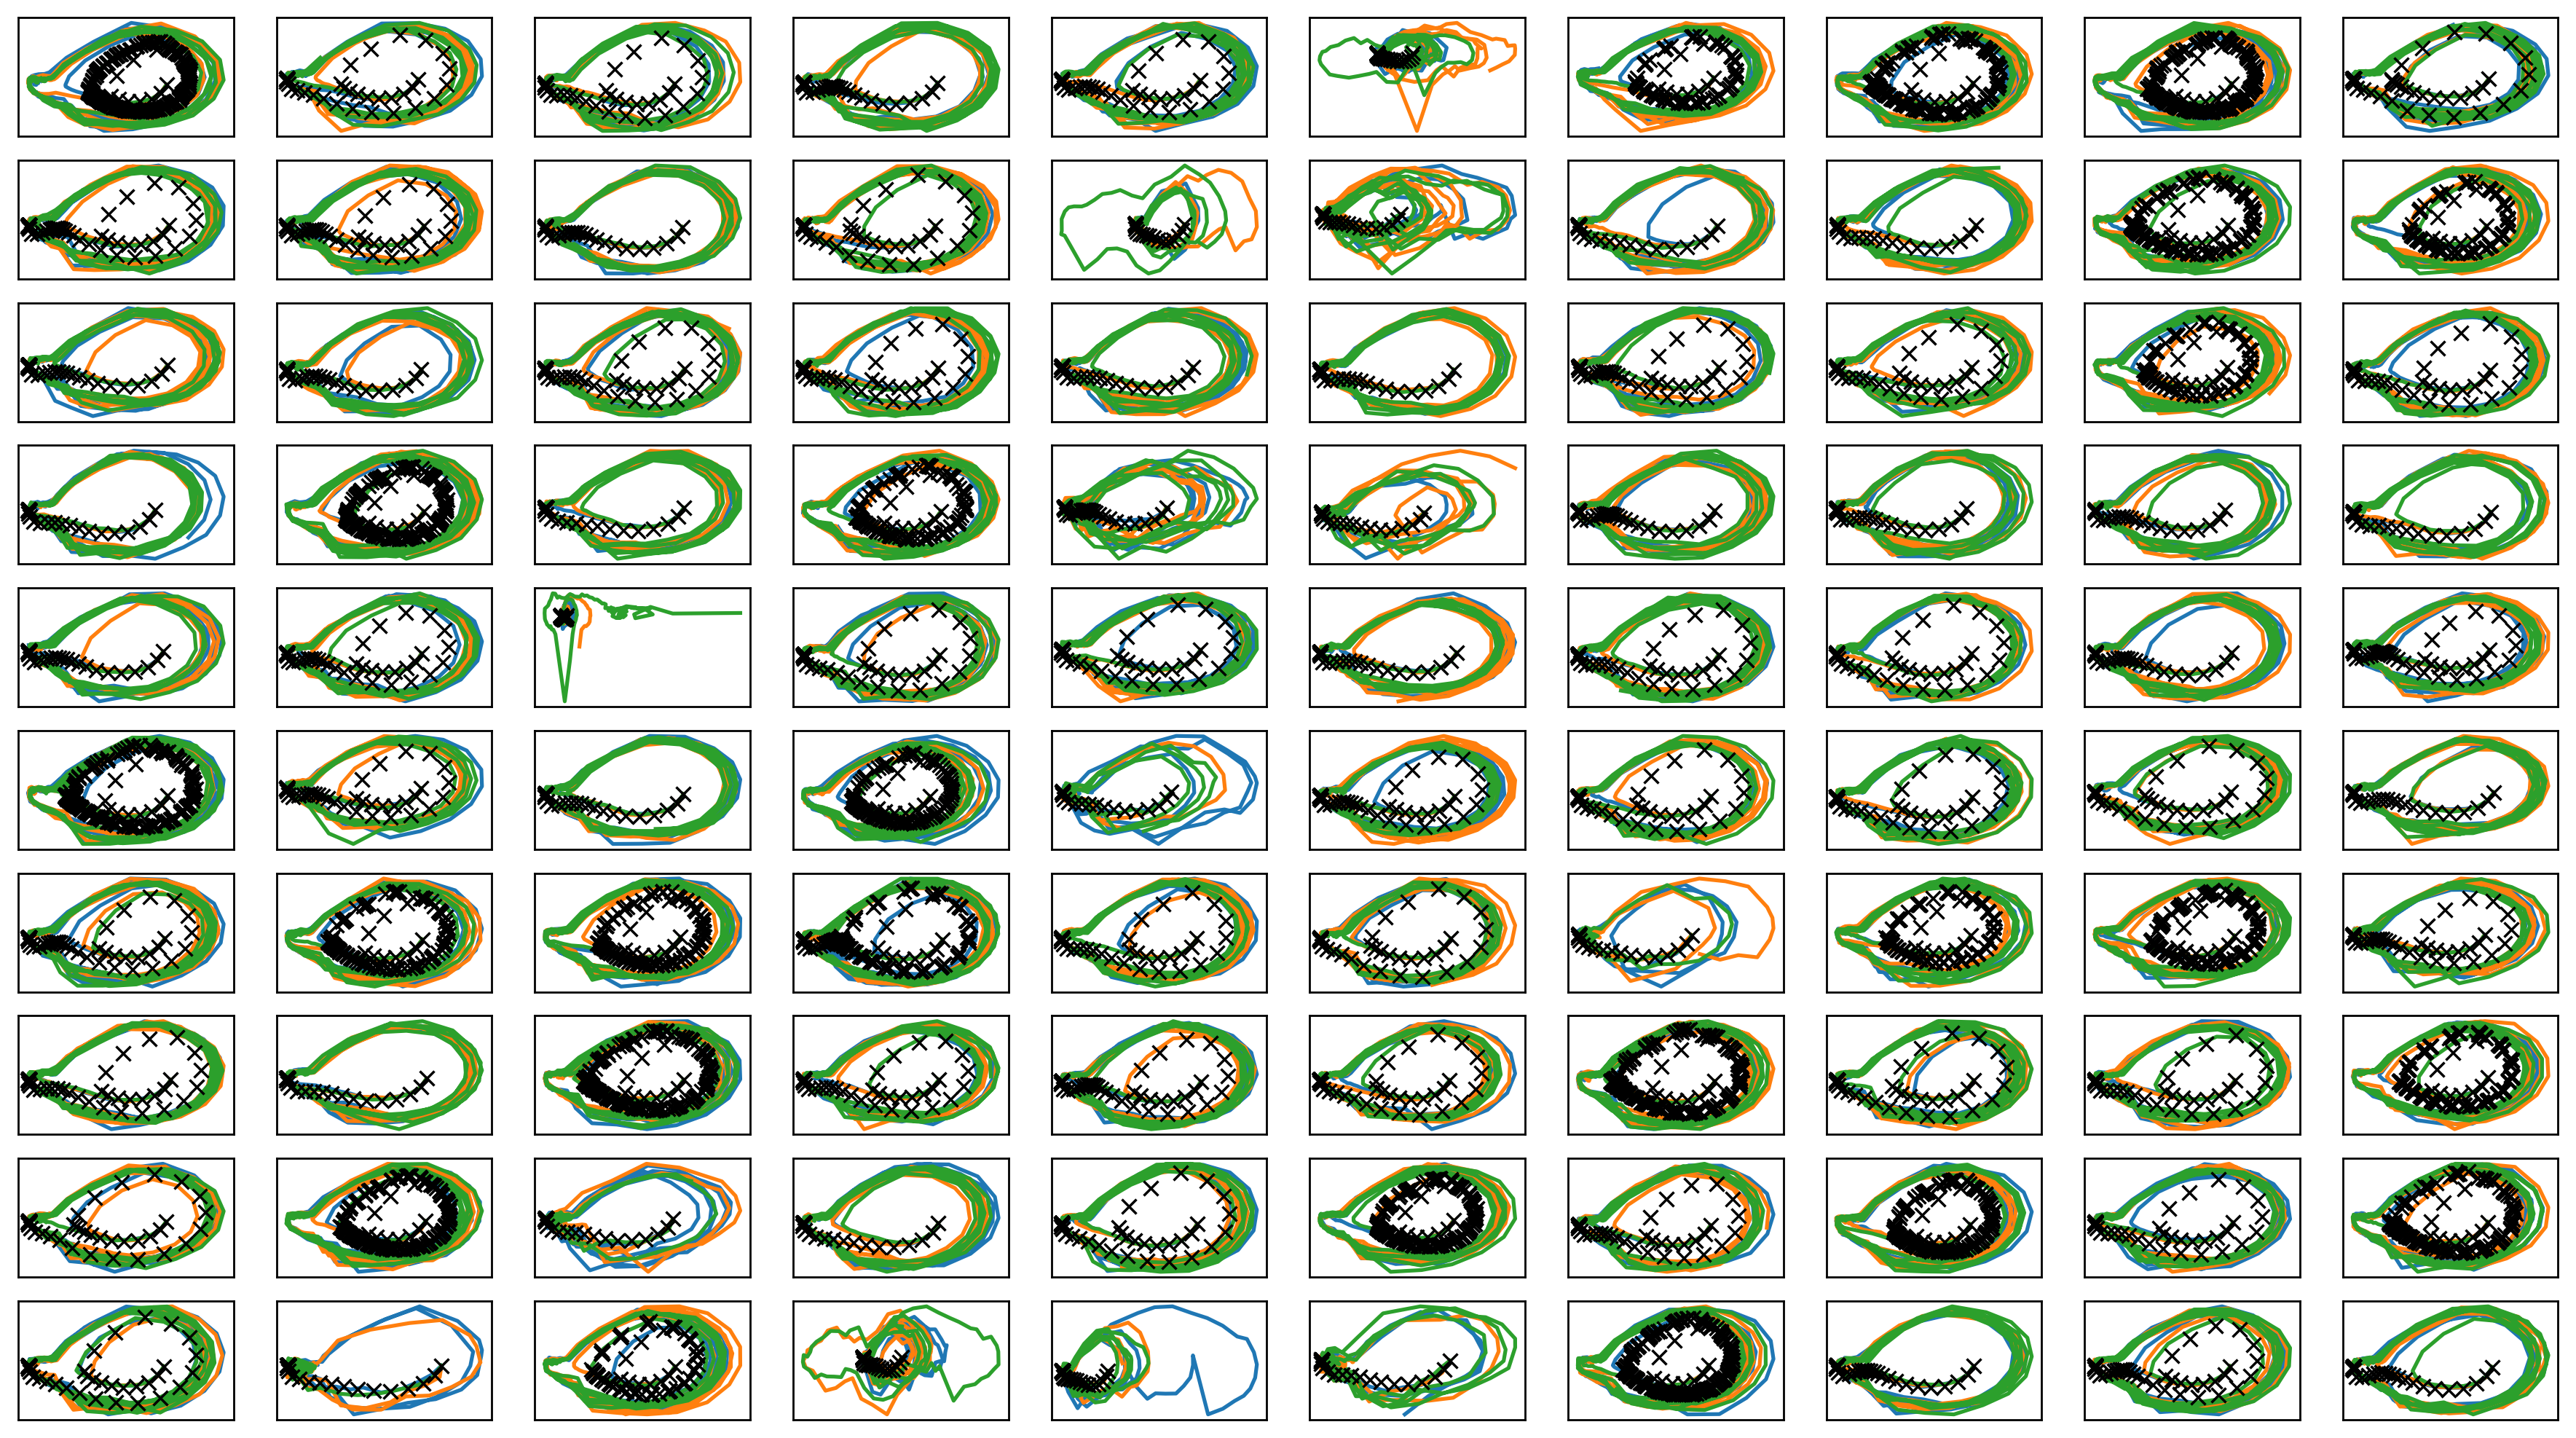

In [11]:
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

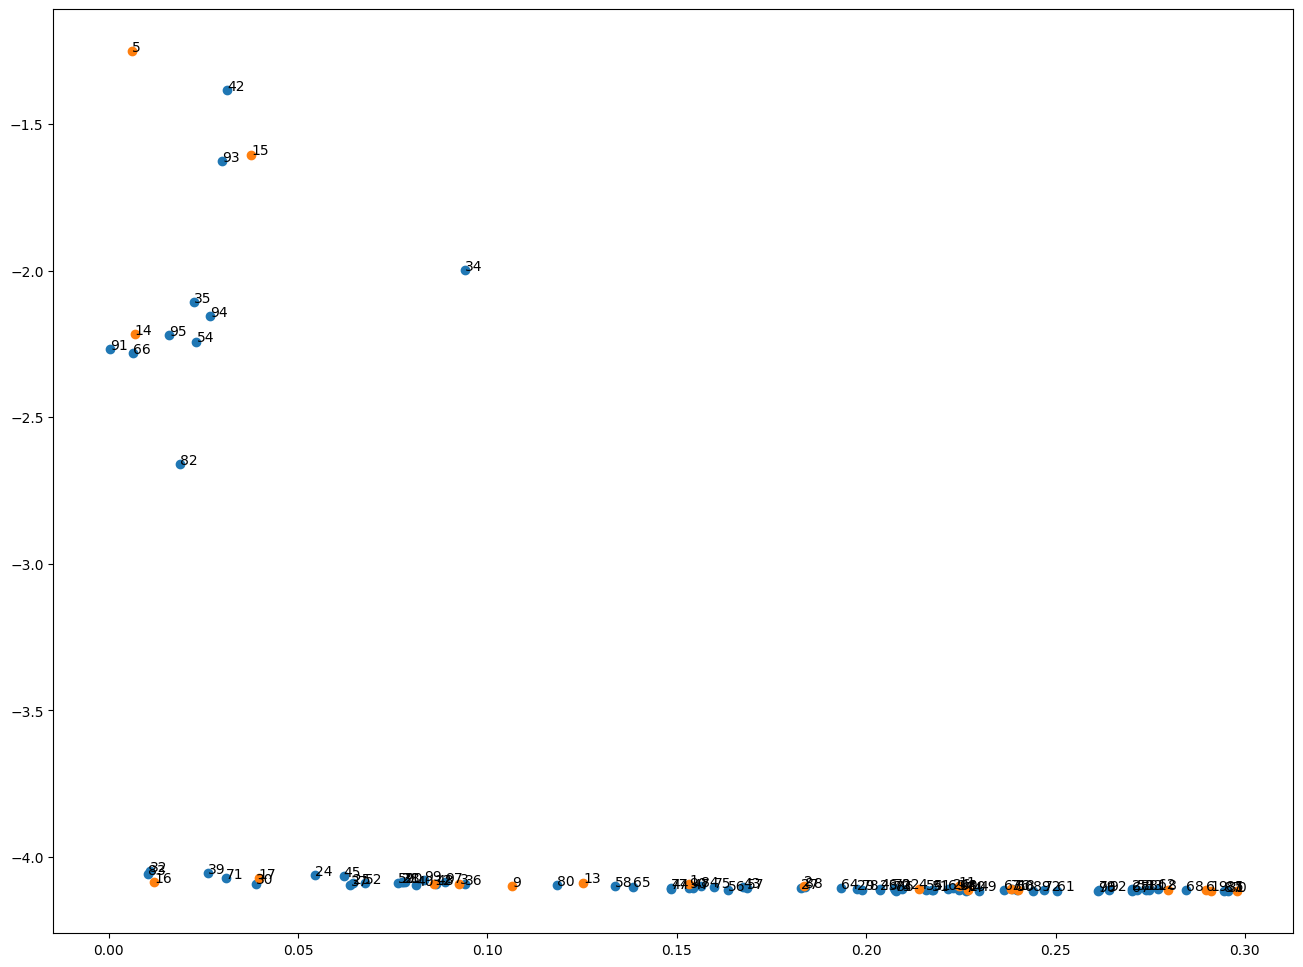

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


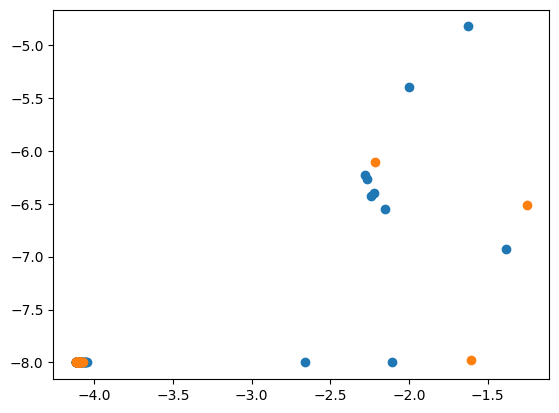

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-03-04 15:34:37.981729


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 8.14347  validloss 8.30205±0.00000  bestvalidloss 8.30205  last_update 0
train: iter 1  trainloss 7.42236  validloss 7.52242±0.00000  bestvalidloss 7.52242  last_update 0
train: iter 2  trainloss 6.79927  validloss 6.87389±0.00000  bestvalidloss 6.87389  last_update 0
train: iter 3  trainloss 6.26636  validloss 6.31994±0.00000  bestvalidloss 6.31994  last_update 0
train: iter 4  trainloss 5.80157  validloss 5.83361±0.00000  bestvalidloss 5.83361  last_update 0
train: iter 5  trainloss 5.41307  validloss 5.44189±0.00000  bestvalidloss 5.44189  last_update 0
train: iter 6  trainloss 5.07168  validloss 5.08090±0.00000  bestvalidloss 5.08090  last_update 0
train: iter 7  trainloss 4.76979  validloss 4.78210±0.00000  bestvalidloss 4.78210  last_update 0
train: iter 8  trainloss 4.50465  validloss 4.50880±0.00000  bestvalidloss 4.50880  last_update 0
train: iter 9  trainloss 4.26880  validloss 4.26302±0.00000  bestvalidloss 4.26302  last_update 0
train: iter 10  trai

train: iter 85  trainloss 1.09384  validloss 1.29815±0.00000  bestvalidloss 1.28480  last_update 2
train: iter 86  trainloss 1.08278  validloss 1.29908±0.00000  bestvalidloss 1.28480  last_update 3
train: iter 87  trainloss 1.07968  validloss 1.30308±0.00000  bestvalidloss 1.28480  last_update 4
train: iter 88  trainloss 1.07306  validloss 1.27820±0.00000  bestvalidloss 1.27820  last_update 0
train: iter 89  trainloss 1.06768  validloss 1.28190±0.00000  bestvalidloss 1.27820  last_update 1
train: iter 90  trainloss 1.06509  validloss 1.29394±0.00000  bestvalidloss 1.27820  last_update 2
train: iter 91  trainloss 1.06161  validloss 1.28576±0.00000  bestvalidloss 1.27820  last_update 3
train: iter 92  trainloss 1.05061  validloss 1.29552±0.00000  bestvalidloss 1.27820  last_update 4
train: iter 93  trainloss 1.04704  validloss 1.29400±0.00000  bestvalidloss 1.27820  last_update 5
train: iter 94  trainloss 1.05892  validloss 1.29921±0.00000  bestvalidloss 1.27820  last_update 6
train: ite

train: iter 170  trainloss 1.01843  validloss 1.36937±0.00000  bestvalidloss 1.27820  last_update 82
train: iter 171  trainloss 1.03213  validloss 1.38361±0.00000  bestvalidloss 1.27820  last_update 83
train: iter 172  trainloss 1.02350  validloss 1.33193±0.00000  bestvalidloss 1.27820  last_update 84
train: iter 173  trainloss 1.01319  validloss 1.37011±0.00000  bestvalidloss 1.27820  last_update 85
train: iter 174  trainloss 1.03211  validloss 1.36412±0.00000  bestvalidloss 1.27820  last_update 86
train: iter 175  trainloss 1.01797  validloss 1.37222±0.00000  bestvalidloss 1.27820  last_update 87
train: iter 176  trainloss 1.02804  validloss 1.36927±0.00000  bestvalidloss 1.27820  last_update 88
train: iter 177  trainloss 1.01244  validloss 1.36531±0.00000  bestvalidloss 1.27820  last_update 89
train: iter 178  trainloss 1.02817  validloss 1.38570±0.00000  bestvalidloss 1.27820  last_update 90
train: iter 179  trainloss 1.01995  validloss 1.33850±0.00000  bestvalidloss 1.27820  last_

In [16]:
print(vi.initial_belief)


Parameter containing:
tensor([-3.8530, -0.7759], requires_grad=True)


In [17]:
vi.save()

In [18]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

get_belief:  [-2.3721867 -7.339331 ] iter 2533 len 199 compute_time 0.941 best_loss -404 loss.item() -402
get_belief:  [-2.1002545 -7.7770243] iter 579 len 199 compute_time 0.211 best_loss -23.2 loss.item() -21.6
get_belief:  [-2.7178059 -6.7389073] iter 2176 len 199 compute_time 0.809 best_loss -278 loss.item() -276


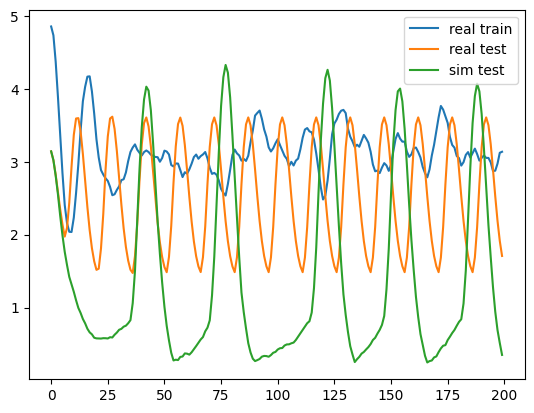

encoder [-4.1156354 -8.       ]
initial_belief tensor([-3.8530, -0.7759])
real train tensor([-2.3722, -7.3393])
real test tensor([-2.1003, -7.7770])
sim tensor([-2.7178, -6.7389])


In [19]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.1020408163265305


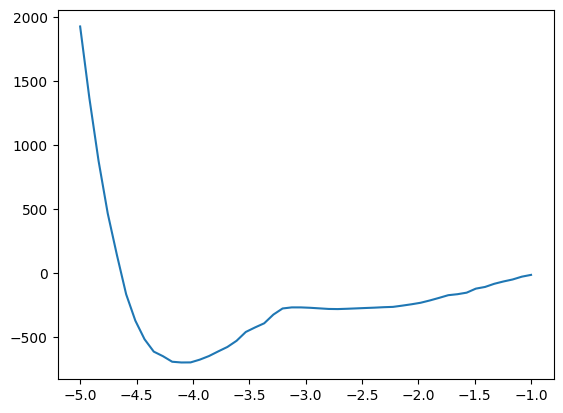

In [20]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])